### Summary for this notebook:

We tried to use the final_audio_data.csv file as dataset to do some EDA and tranditional ML model, but results are awful, and not that useful to make improvements. The main reason is our dataset is not that useful. The number of each song type is inconsistently distributed, and it is not complete to use only some sound qualities as criteria for judging song genre. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("final_audio_data.csv")
df.head()

,index,Artist Name,Artist_id,Track Name,Track ID,Popularity,acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Mode,Loudness,Tempo,Time_signature,Speechiness,Valence,Genre
0,14,Eminem,7dGJo4pcD2V6oG8kP0tJRR,Love The Way You Lie,15JINEqzVMv3SvJTAXAKED,82,0.2410,0.749,263373,0.925,0.0,10,0.5200,1,-5.034,86.989,4,0.2270,0.6410,hip hop
1,0,Mac Miller,4LLpKhyESsyAXpc4laK94U,The Spins,51pshtuYkgUQnt5huMPbKL,81,0.0135,0.794,195873,0.766,0.0,9,0.0785,0,-3.894,127.007,4,0.0377,0.5500,hip hop
2,2,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,81,0.0134,0.635,220734,0.841,0.0,5,0.0622,1,-5.379,109.021,4,0.0422,0.4240,pop
3,3,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,Talking to the Moon,161DnLWsx1i3u1JT05lzqU,81,0.5110,0.498,217867,0.590,0.0,1,0.1070,0,-4.721,145.867,4,0.0320,0.0784,pop
4,25,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,Baby,6epn3r7S14KUqlReYr77hA,81,0.0401,0.728,214240,0.859,0.0,5,0.1110,0,-5.237,65.043,4,0.1370,0.5350,pop


In [3]:
df.isnull().sum()

index               0
Artist Name         0
Artist_id           0
Track Name          0
Track ID            0
Popularity          0
acousticness        0
Danceability        0
Duration_ms         0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Mode                0
Loudness            0
Tempo               0
Time_signature      0
Speechiness         0
Valence             0
Genre               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5781 non-null   int64  
 1   Artist Name       5781 non-null   object 
 2   Artist_id         5781 non-null   object 
 3   Track Name        5781 non-null   object 
 4   Track ID          5781 non-null   object 
 5   Popularity        5781 non-null   int64  
 6   acousticness      5781 non-null   float64
 7   Danceability      5781 non-null   float64
 8   Duration_ms       5781 non-null   int64  
 9   Energy            5781 non-null   float64
 10  Instrumentalness  5781 non-null   float64
 11  Key               5781 non-null   int64  
 12  Liveness          5781 non-null   float64
 13  Mode              5781 non-null   int64  
 14  Loudness          5781 non-null   float64
 15  Tempo             5781 non-null   float64
 16  Time_signature    5781 non-null   int64  


In [5]:
df.drop(['index', 'Artist Name', 'Artist_id', 'Track Name', 'Track ID'], axis=1, inplace=True)

In [38]:
label = df['Genre']
df.head() # all numeric value and the only genre label in df

,Popularity,acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Mode,Loudness,Tempo,Time_signature,Speechiness,Valence,Genre
0,82,0.2410,0.749,263373,0.925,0.0,10,0.5200,1,-5.034,86.989,4,0.2270,0.6410,hip hop
1,81,0.0135,0.794,195873,0.766,0.0,9,0.0785,0,-3.894,127.007,4,0.0377,0.5500,hip hop
2,81,0.0134,0.635,220734,0.841,0.0,5,0.0622,1,-5.379,109.021,4,0.0422,0.4240,pop
3,81,0.5110,0.498,217867,0.590,0.0,1,0.1070,0,-4.721,145.867,4,0.0320,0.0784,pop
4,81,0.0401,0.728,214240,0.859,0.0,5,0.1110,0,-5.237,65.043,4,0.1370,0.5350,pop


In [39]:
data = df.copy()
data.drop(['Genre'], axis = 1, inplace = True)

In [40]:
df.columns

Index(['Popularity', 'acousticness', 'Danceability', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Mode', 'Loudness', 'Tempo',
       'Time_signature', 'Speechiness', 'Valence', 'Genre'],
      dtype='object')

## Histograms

Text(0.5, 1.0, 'Popularity for Spotify Data')

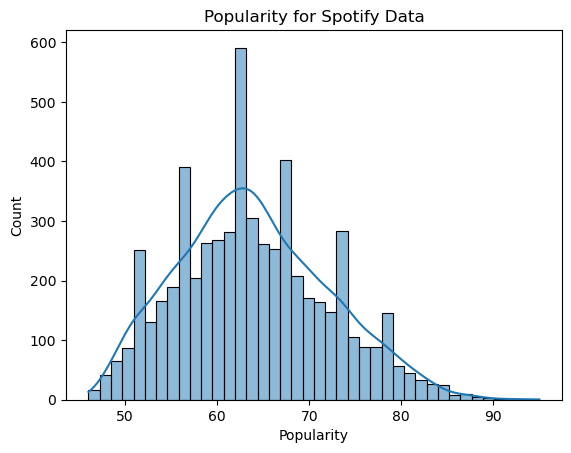

In [13]:
sns.histplot(data['Popularity'], kde=True)
plt.title('Popularity for Spotify Data')

Text(0.5, 1.0, 'Popularity for Spotify Data')

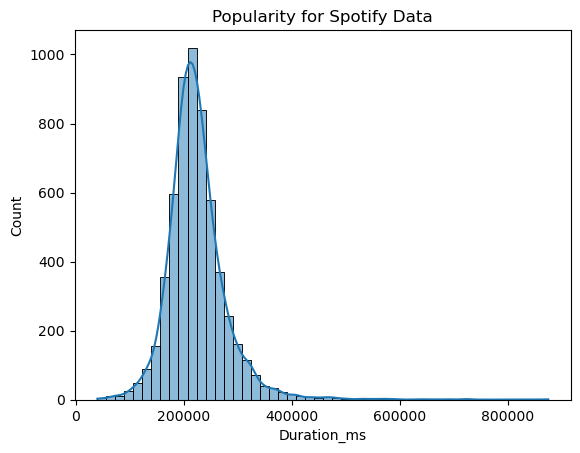

In [17]:
sns.histplot(data['Duration_ms'], bins = 50, kde=True)
plt.title('Popularity for Spotify Data')

## Genre

In [29]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


Text(0.5, 1.0, 'Genre Count for Spotify Data')

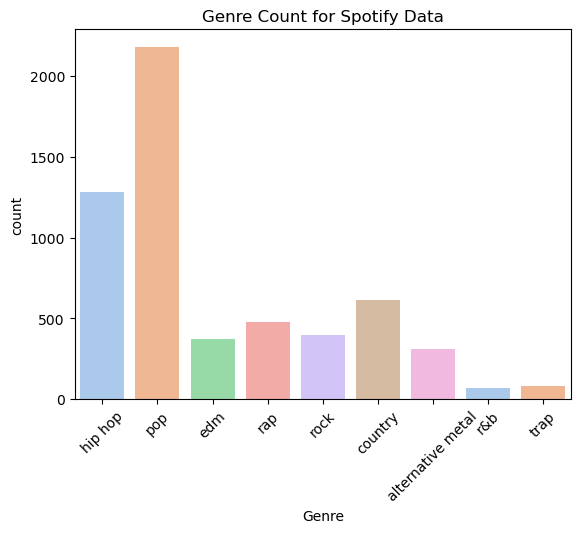

In [30]:
g = sns.countplot(x=df["Genre"], palette=['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4'])
plt.xticks(rotation=45)
plt.title('Genre Count for Spotify Data')

## Heatmap

From the graph below, we notice that, basically, these features are independent withe each other. Except energy vs. loudness. 

<AxesSubplot:>

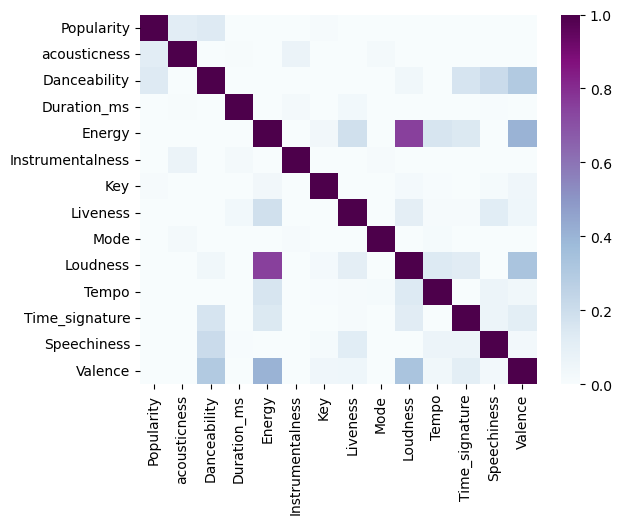

In [46]:
sns.heatmap(data.corr(), vmin = 0, vmax = 1, cmap = "BuPu")

Text(0.5, 1.0, 'Energy versus Loudness')

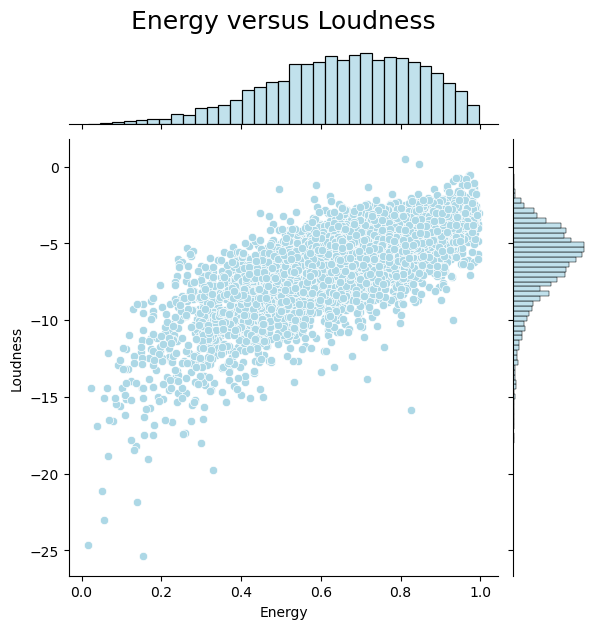

In [36]:
sns.jointplot(x = "Energy", y = "Loudness", edgecolor = "white", data = df, color = 'lightblue');
plt.title("Energy versus Loudness", size=18, pad=80)

## Data Pre-processing

In [48]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

scalar = StandardScaler()
x_train = pd.DataFrame(scalar.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scalar.transform(x_test), columns = x_test.columns)

(5781, 14)

In [61]:
pca = PCA()
pca.fit_transform(x_train)
explained_variance=pca.explained_variance_ratio_
print(np.cumsum(explained_variance))

[0.19004748 0.30017043 0.38849541 0.46599962 0.54135317 0.61270557
 0.68086789 0.74741184 0.8080625  0.86432711 0.91306683 0.95644358
 0.98650042 1.        ]


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

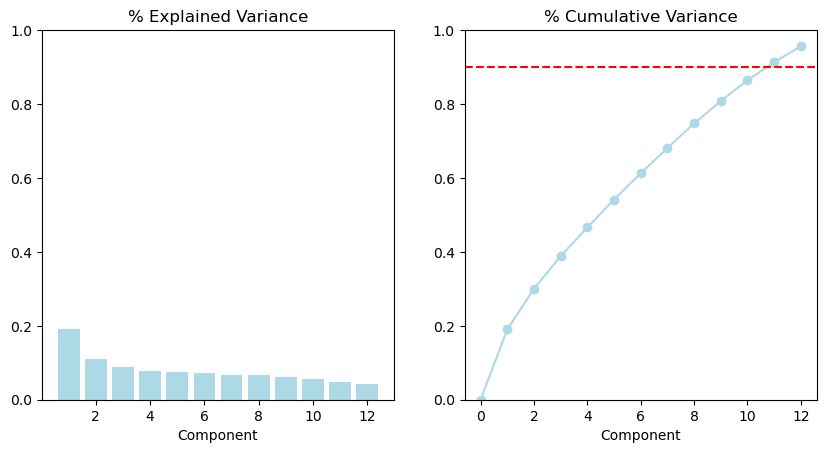

In [67]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n_comp = pca.n_components_
    step = np.arange(1, n_comp + 1)

    evr = pca.explained_variance_ratio_
    axs[0].bar(step, evr, color = 'lightblue')
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, step], np.r_[0, cv], "o-", color = 'lightblue')
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))
    plt.axhline(y=0.90, color='r', linestyle='--')
    
    fig.set(figwidth=10, dpi=100)
    return axs

plot_variance(pca)

From the **explained_variance** and two plots above, we see, if we want to keep over 90% variance in our dataset, we need to keep 12 features.

In [69]:
pca = PCA(12)
x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))

## KNN

In [75]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_test, y_test)))

Training set score: 0.5900
Test set score: 0.4659


This looks really bad :(

## SVM

In [85]:
# import SVC classifier
from sklearn.svm import SVC

svc=SVC() 
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5013


In [87]:
print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

Training set score: 0.6060
Test set score: 0.5013


This also looks bad. 